# Data @ ANZ Virtual Experience Program
# Exploratory Data Analysis

## Background Information
The data set below contains transations of 100 hypothetical customers over the course of three months. It contains useful information including customer name and identity, as well as transaction amounts and currency. In this notebook, we will conduct exploratory data analysis on the data set.

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import re

In [2]:
df = pd.read_excel('anz.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.shape # 12043 rows, 23 columns in the data set

(12043, 23)

In [4]:
df.dtypes # column names and their data types

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

There are some data issues, notably that many columns in the data set have null/NaN values, which make it more difficult to perform testing and analysis. null/NaN values should be imputed according to what is best in preserving the integrity of the data.


In [5]:
print(np.unique(df['country'])) # all transactions were made in Australia
print(np.unique(df['currency'])) # all transactions were made in AUD

['Australia']
['AUD']


In [6]:
# average transaction amount
np.mean(df['amount']) # 187.93 AUD

187.93358797641767

In [7]:
# average number of transations per month
np.mean(df.groupby('account').size()) # 120.43 transactions per month

120.43

Visualizing transaction spending over the course of an average week.

In [8]:
df['day_of_week'] = df['date'].dt.dayofweek # add new column specifying the day of the week

In [9]:
df[['day_of_week','amount']].head()

,day_of_week,amount
0,2,16.25
1,2,14.19
2,2,6.42
3,2,40.90
4,2,3.25


0: Monday
1: Tuesday
2: Wednesday
3: Thursday
4: Friday
5: Saturday
6: Sunday

Transaction spending is not distributed uniformly. Very small transaction spending occurs on the weekends, whereas large transaction spending occurs during the week.

Text(0.5, 1.0, 'Spending Across an Average Week')

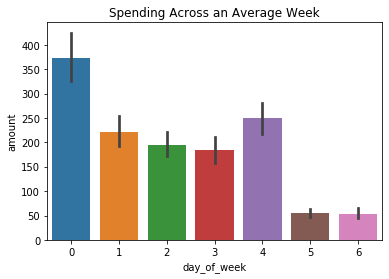

In [26]:
sns.barplot(x='day_of_week',y='amount',data=df).set_title("Spending Across an Average Week")

Visualizing transaction volume over the course of an average week.

In [11]:
dow_counts = df.groupby('day_of_week').size()
dow_counts

day_of_week
0    1360
1    1487
2    2063
3    1801
4    2073
5    1709
6    1550
dtype: int64

0: Monday 1: Tuesday 2: Wednesday 3: Thursday 4: Friday 5: Saturday 6: Sunday

Transaction volume is distributed roughly uniformly, though there are peaks on Wednesday and Friday.

Text(0.5, 1.0, 'Transaction Volume Across an Average Week')

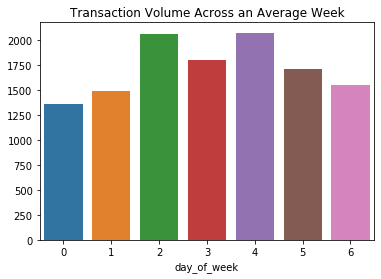

In [27]:
sns.barplot(x=dow_counts.index,y=dow_counts).set_title("Transaction Volume Across an Average Week")

Visualizing transaction spending over the course of an average day.

In [13]:
hours = []
for i in df['extraction']:
    hours.append(re.search('[0-9]{2}:[0-9]{2}:[0-9]{2}',i)[0][:2])
df['hour'] = hours

In [14]:
df[['hour','amount']].head()

,hour,amount
0,01,16.25
1,01,14.19
2,01,6.42
3,01,40.90
4,01,3.25


Transaction spending is not distributed uniformly across the hours in a day. Very small transaction spending occurs late at night or early in the morning, whereas large transaction spending occurs during the afternoon and evening.

Text(0.5, 1.0, 'Spending Across an Average Day')

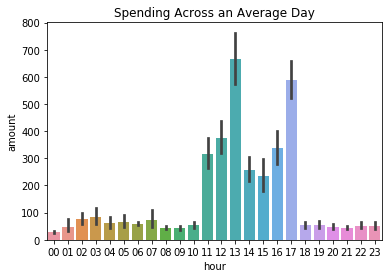

In [28]:
sns.barplot(x='hour',y='amount',data=df).set_title("Spending Across an Average Day")

Visualizing transaction volume over the course of an average day.

In [16]:
hour_counts = df.groupby('hour').size()

Transaction volume is not distributed uniformly across the hours in a day. There are small transaction volumes  late at night or early in the morning, whereas there are large transaction volumes during the afternoon and evening.

Text(0.5, 1.0, 'Transaction Volume Across an Average Day')

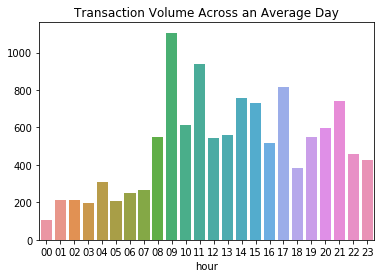

In [29]:
sns.barplot(x=hour_counts.index,y=hour_counts).set_title("Transaction Volume Across an Average Day")

When plotting the column, 'amount' on its own or grouped by 'day_of_week' or 'hour', values tend to clump towards one end and have scattered outliers on the other end. Most transaction amounts are less than $4000 AUD. Very few are higher amounts.

Text(0.5, 1.0, 'Transaction Amounts')

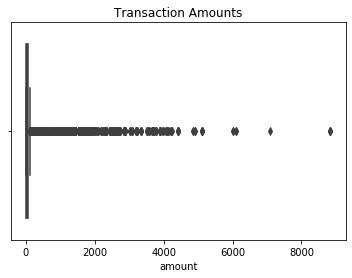

In [30]:
sns.boxplot(x=df["amount"]).set_title("Transaction Amounts")

Text(0.5, 1.0, 'Transaction Amounts Across an Average Week')

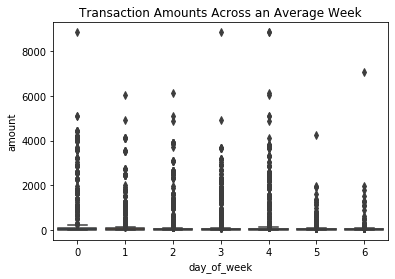

In [31]:
sns.boxplot(x="day_of_week", y="amount", data=df).set_title("Transaction Amounts Across an Average Week")

Text(0.5, 1.0, 'Transaction Amounts Across an Average Day')

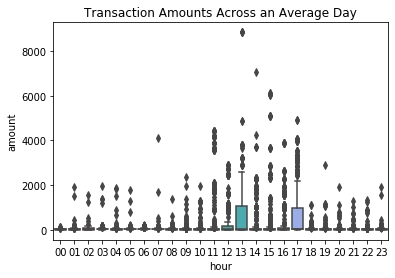

In [32]:
sns.boxplot(x="hour", y="amount", data=df).set_title("Transaction Amounts Across an Average Day")

Anything that lies outside of lower and upper bound is an outlier. Here are some descriptive statistics of 'amount.'

In [21]:
basic_stats = df['amount'].sort_values().describe()
basic_stats

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

Anything outside the boundary is considered an outlier.

In [22]:
q1 = basic_stats['25%']
q3 = basic_stats['75%']
iqr = q3-q1
lower_bound = q1*1.5
upper_bound = q3*1.5
lower_bound, upper_bound

(24.0, 80.4825)

The data frame below contains information of the transations that had amounts within the bounds, ie. outliers have been removed.

In [23]:
df_no_outliers = df[(df['amount'] >= lower_bound) & (df['amount'] <= upper_bound)]
df_no_outliers.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,day_of_week,hour
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,2,01
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit,2,02
10,posted,NaN,NaN,ACC-2171593283,AUD,146.94 -36.04,PAYMENT,NaN,NaN,Fernando,...,NaN,2018-08-01T06:00:00.000+0000,27.00,baff17b27b2643c48c84fca7129e9611,Australia,CUS-2317998716,NaN,debit,2,06
11,posted,NaN,NaN,ACC-2776252858,AUD,144.95 -37.76,PAYMENT,NaN,NaN,Kristin,...,NaN,2018-08-01T06:00:00.000+0000,29.00,78a1b6c3a5534d48828d8ed266ba9c2e,Australia,CUS-4123612273,NaN,debit,2,06
13,posted,NaN,NaN,ACC-588564840,AUD,151.27 -33.76,INTER BANK,NaN,NaN,Isaiah,...,NaN,2018-08-01T07:00:00.000+0000,25.00,eaafa602902b4f4194efb96a105dd7ab,Australia,CUS-1462656821,NaN,debit,2,07


Using the dataframe with no outlier 'amount' values, the resulting barplots showing the distribution of transaction amounts across the days of the week and across the hours of the day are roughly uniform. This tells us that the outliers skew the data greatly.

Text(0.5, 1.0, 'Transaction Amounts Across an Average Week Without Outliers')

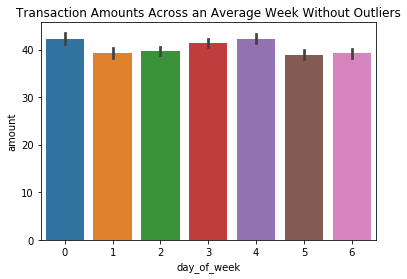

In [33]:
sns.barplot(x='day_of_week',y='amount',data=df_no_outliers).set_title("Transaction Amounts Across an Average Week Without Outliers")

Text(0.5, 1.0, 'Transaction Amounts Across an Average Day Without Outliers')

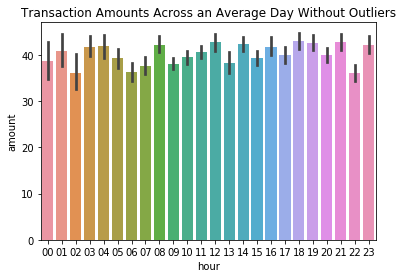

In [34]:
sns.barplot(x='hour',y='amount',data=df_no_outliers).set_title("Transaction Amounts Across an Average Day Without Outliers")